### softmax를 이용하여 다중 클래스 분류

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

Using TensorFlow backend.


### 1. Generating Random Data

In [2]:
M = 2 # input_dim
K = 3 # number of classes
n = 100 # number of data in each class
N = n * K # Total number of data

In [3]:
X1 = np.random.randn(n, M) + np.array([0, 10])
X2 = np.random.randn(n, M) + np.array([5, 5])
X3 = np.random.randn(n, M) + np.array([10, 0])
Y1 = np.array([[1, 0, 0] for i in range(n)])
Y2 = np.array([[0, 1, 0] for i in range(n)])
Y3 = np.array([[0, 0, 1] for i in range(n)])

X = np.concatenate((X1, X2, X3), axis=0)
Y = np.concatenate((Y1, Y2, Y3), axis=0)

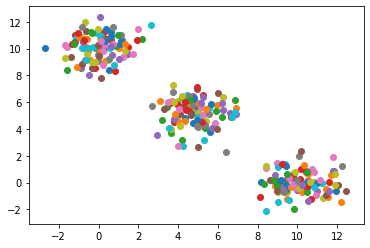

In [4]:
for i in X:
    plt.scatter(i[0], i[1])

### 2. Modeling with Keras

Sequential(): 계층 구조를 이루는 모델을 정의
- 미리 계층 구조 모델을 정의하고 add()로 층을 계속 추가 함
Dense(): 입력차원과 출력차원인 네트워크 구조를 이루는 층을 생성
- input_dim = 입력 차원
- units = 출력 차원

Activation(): 활성 함수를 표현하는 층
- sigmoid, softmax, etc..

compile(): 학습 방식에 대한 환경 설정
- optimizer = 정규화기
- loss = 손실 함수 (모델이 최적화에 사용되는 목적 함수)
- metrics = 기준 리스트 (분류에서는 metrics = ['accuracy'])

In [5]:
# Sequential(): 계층 구조를 이루는 모델을 정의
model = Sequential() 
# Dense(): 입력차원과 출력차원인 네트워크 구조를 이루는 층을 생성
# input_dim = 입력 차원
# units  = 
model.add(Dense(input_dim = M, units = K)) 
model.add(Activation('softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = SGD(lr = 0.1))

### 3. Learn the model

In [6]:
minibatch = 50
model.fit(X, Y, epochs = 20, batch_size = minibatch)


Epoch 1/20
300/300 [==============================] - 0s 400us/step - loss: 0.9994
Epoch 2/20
300/300 [==============================] - 0s 37us/step - loss: 0.1355
Epoch 3/20
300/300 [==============================] - 0s 23us/step - loss: 0.1042
Epoch 4/20
300/300 [==============================] - 0s 24us/step - loss: 0.0878
Epoch 5/20
300/300 [==============================] - 0s 27us/step - loss: 0.0775
Epoch 6/20
300/300 [==============================] - 0s 33us/step - loss: 0.0680
Epoch 7/20
300/300 [==============================] - 0s 23us/step - loss: 0.0617
Epoch 8/20
300/300 [==============================] - 0s 34us/step - loss: 0.0561
Epoch 9/20
300/300 [==============================] - 0s 30us/step - loss: 0.0521
Epoch 10/20
300/300 [==============================] - 0s 32us/step - loss: 0.0485
Epoch 11/20
300/300 [==============================] - 0s 31us/step - loss: 0.0451
Epoch 12/20
300/300 [==============================] - 0s 28us/step - loss: 0.0425
Epoch 13/20

### 4. Result

10개만 확인해보기

In [7]:
x_, y_ = shuffle(X, Y)
classes = model.predict_classes(x_[0:10], batch_size = minibatch)
prob = model.predict_proba(x_[0:10], batch_size = minibatch)
print('classified:', np.argmax(model.predict(x_[0:10]), axis = 1)==classes)
print('probability:', prob)

classified: [ True  True  True  True  True  True  True  True  True  True]
probability: [[9.9569869e-01 4.3012928e-03 2.2380110e-08]
 [1.7549260e-08 2.7396759e-02 9.7260314e-01]
 [9.9890673e-01 1.0932616e-03 5.2332687e-11]
 [2.3358362e-03 9.9158889e-01 6.0751853e-03]
 [9.9012297e-01 9.8769777e-03 5.7000102e-09]
 [2.2540214e-11 1.5015239e-03 9.9849844e-01]
 [2.9727507e-09 4.2791576e-03 9.9572092e-01]
 [9.7359180e-01 2.6408179e-02 3.1308140e-08]
 [9.8023248e-01 1.9767372e-02 8.3141146e-08]
 [9.9013317e-01 9.8669156e-03 4.7293280e-09]]
